In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd, csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:

file_path = '/content/drive/MyDrive/Colab Notebooks/METODOS PROBS/Student_performance_data _.csv'

# Detecta el delimitador; si falla, usa ';' (muy común en datos abiertos de Madrid)
with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    sample = f.read(2048)
    try:
        delim = csv.Sniffer().sniff(sample).delimiter
    except:
        delim = ';'

df = pd.read_csv(file_path, sep=delim, encoding='utf-8', low_memory=False)

In [ ]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


**EDA**

In [ ]:
df['GradeClass'].value_counts()

,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


In [ ]:
# Contar aprobados (0–3) y suspensos (4)
aprobados = df[df["GradeClass"].isin([0, 1, 2, 3])].shape[0]
suspensos = df[df["GradeClass"] == 4].shape[0]

print(f"✅ Aprobados (A–D): {aprobados}")
print(f"❌ Suspensos (F): {suspensos}")

# Si quieres ver también el porcentaje
total = len(df)
print(f"\nPorcentaje aprobados: {aprobados/total:.2%}")
print(f"Porcentaje suspensos: {suspensos/total:.2%}")

✅ Aprobados (A–D): 1181
❌ Suspensos (F): 1211

Porcentaje aprobados: 49.37%
Porcentaje suspensos: 50.63%


In [ ]:
# Información general y Comprobación de valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None


In [ ]:
print("\nDescripción estadística:")
print(df.describe())


Descripción estadística:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.4589

/tmp/ipython-input-217240479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=df, palette='Set2')


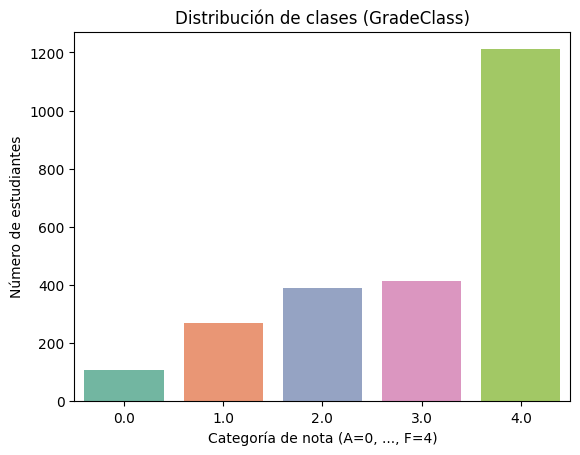

GradeClass
4.0    50.627090
3.0    17.307692
2.0    16.346154
1.0    11.245819
0.0     4.473244
Name: proportion, dtype: float64


In [ ]:
# Distribución de la variable objetivo (GradeClass)
sns.countplot(x='GradeClass', data=df, palette='Set2')
plt.title('Distribución de clases (GradeClass)')
plt.xlabel('Categoría de nota (A=0, ..., F=4)')
plt.ylabel('Número de estudiantes')
plt.show()

# Distribución porcentual
print(df['GradeClass'].value_counts(normalize=True)*100)


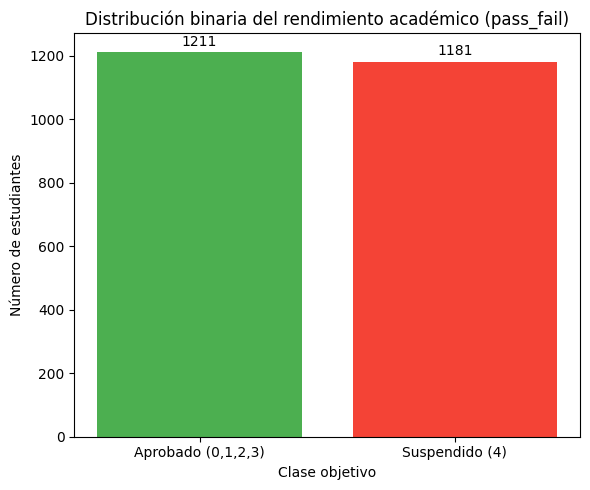

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df y la columna original es 'GradeClass'
# Creamos la variable binaria 'pass_fail'
df['pass_fail'] = df['GradeClass'].apply(lambda x: 0 if x == 4 else 1)

# Contamos los valores de cada clase
counts = df['pass_fail'].value_counts().sort_index()

# Etiquetas para el gráfico
labels = ['Aprobado (0,1,2,3)', 'Suspendido (4)']

# Gráfico de barras
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, counts, color=['#4CAF50', '#F44336'])
plt.title('Distribución binaria del rendimiento académico (pass_fail)')
plt.ylabel('Número de estudiantes')
plt.xlabel('Clase objetivo')

# Mostrar los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass', 'pass_fail'],
      dtype='object')

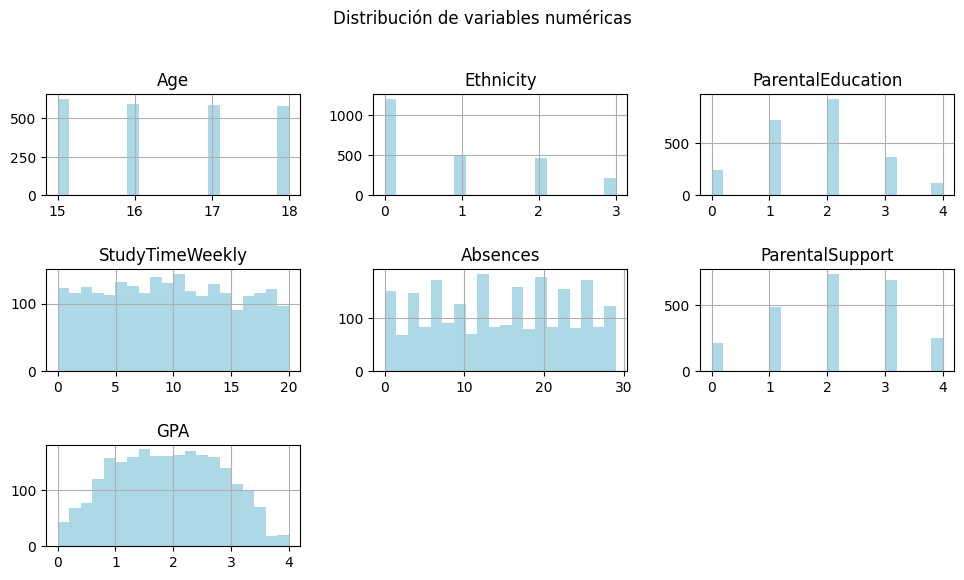

In [ ]:
#Distribuciones de variables numéricas

numeric_cols = ['Age', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'ParentalSupport','GPA']

df[numeric_cols].hist(bins=20, figsize=(10,6), color='lightblue')
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout(pad=2.0)
plt.show()


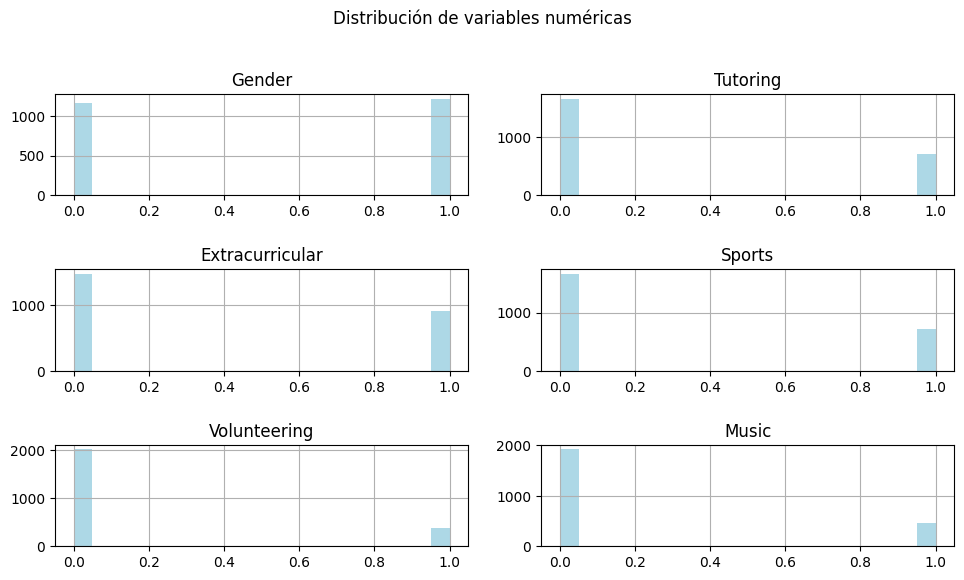

In [ ]:
#Distribuciones de variables numéricas binarias

numeric_cols = ['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Volunteering', 'Music']

df[numeric_cols].hist(bins=20, figsize=(10,6), color='lightblue')
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
# Crear variable binaria Pass/Fail
df['pass_fail'] = df['GradeClass'].apply(lambda x: 1 if x in [0,1,2,3] else 0)

# Verificar
print(df['pass_fail'].value_counts())  # muestra cuántos aprobados (1) y suspensos (0)

df = df.drop(columns=['GPA', 'StudentID', 'GradeClass'])

pass_fail
0    1211
1    1181
Name: count, dtype: int64


In [ ]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,pass_fail
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,1
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,1
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1


/tmp/ipython-input-334183535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass_fail', y=f, data=df, palette='Set3')


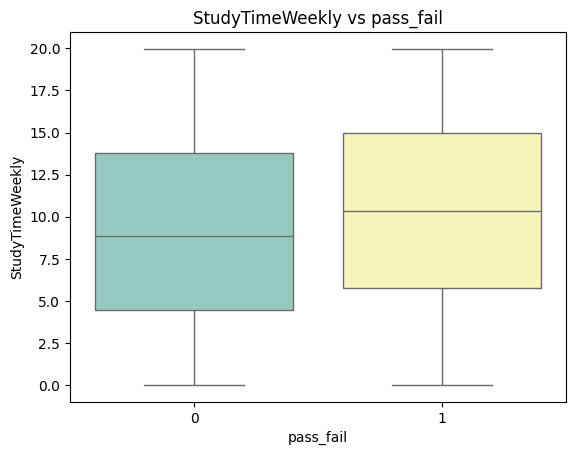

/tmp/ipython-input-334183535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass_fail', y=f, data=df, palette='Set3')


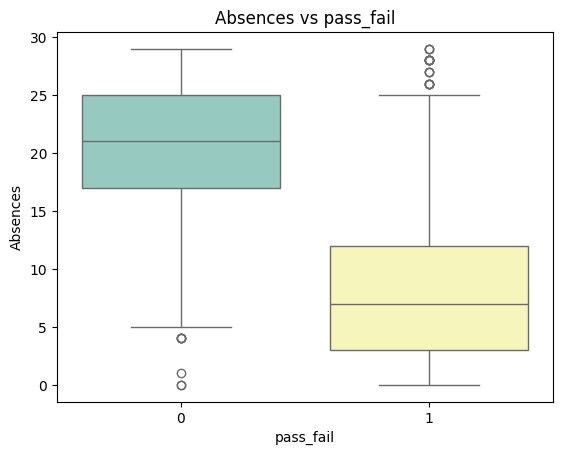

/tmp/ipython-input-334183535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass_fail', y=f, data=df, palette='Set3')


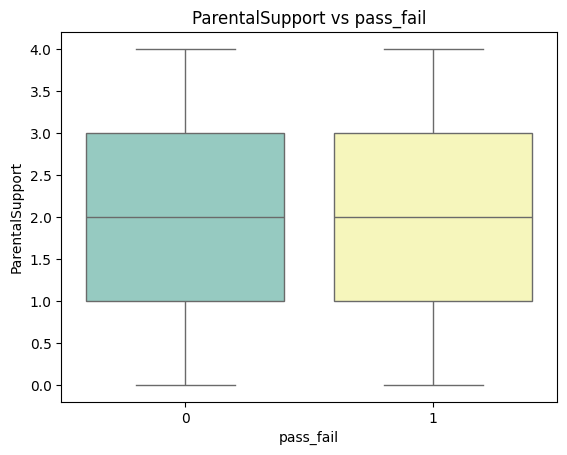

/tmp/ipython-input-334183535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass_fail', y=f, data=df, palette='Set3')


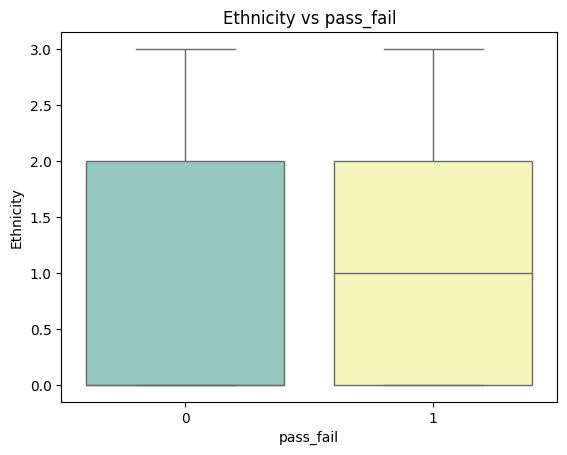

In [ ]:
features = ['StudyTimeWeekly', 'Absences', 'ParentalSupport', 'Ethnicity']

for f in features:
    sns.boxplot(x='pass_fail', y=f, data=df, palette='Set3')
    plt.title(f'{f} vs pass_fail')
    plt.show()


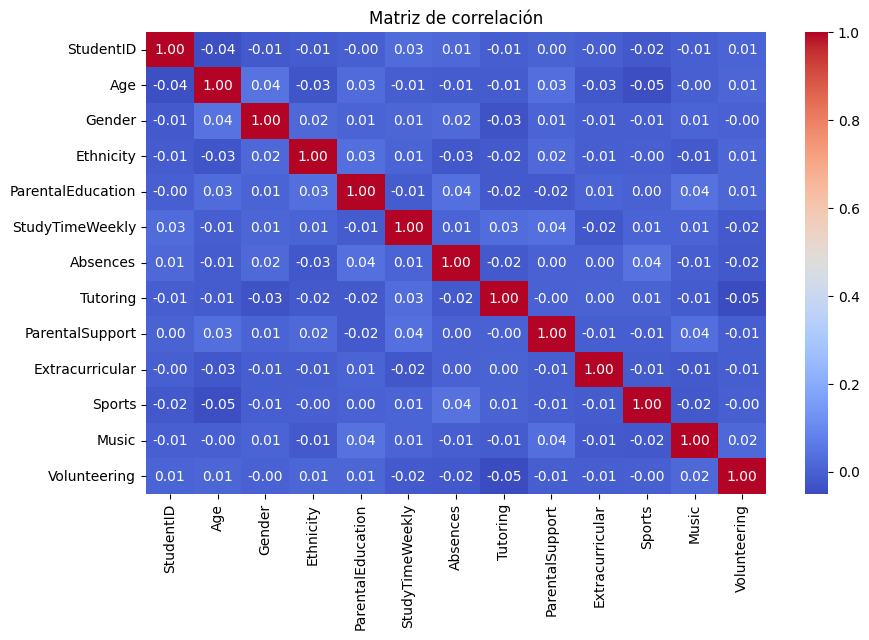

In [ ]:
#Correlaciones Numéricas


plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['pass_fail', 'GPA', 'GradeClass']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


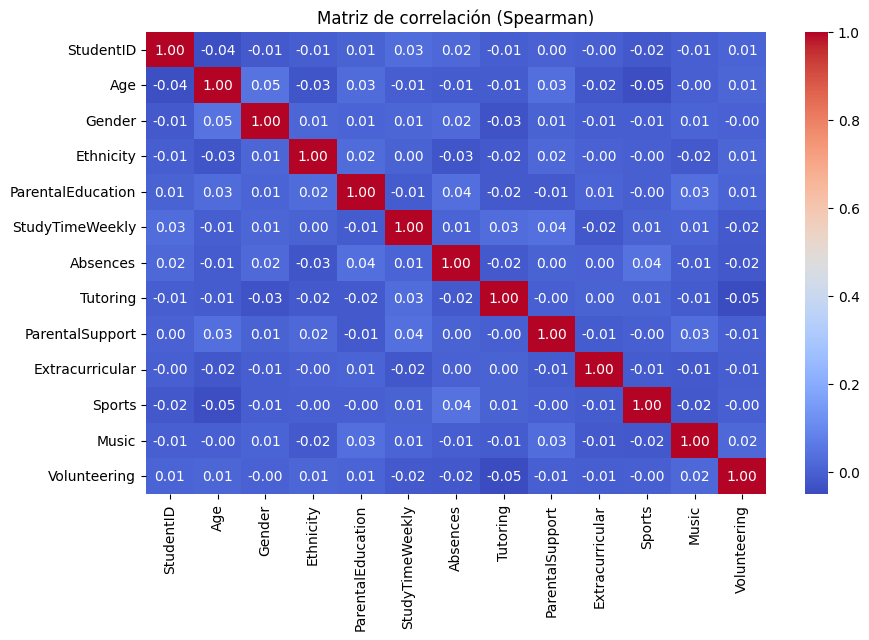

In [ ]:
# Correlaciones Numéricas con Spearman

plt.figure(figsize=(10,6))
sns.heatmap(
    df.drop(columns=['pass_fail', 'GPA', 'GradeClass']).corr(method='spearman'),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Matriz de correlación (Spearman)')
plt.show()


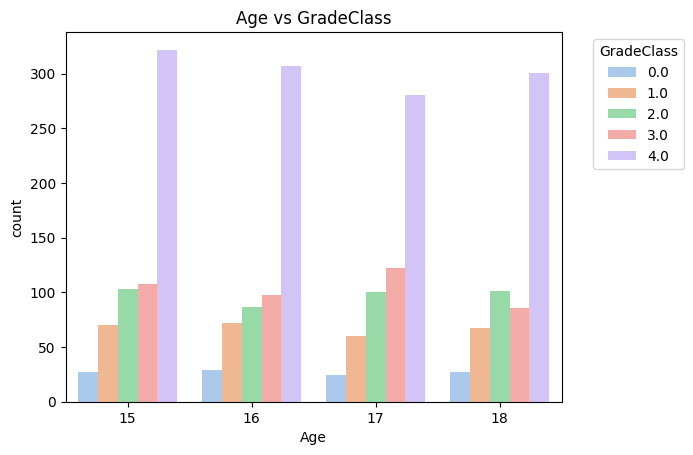

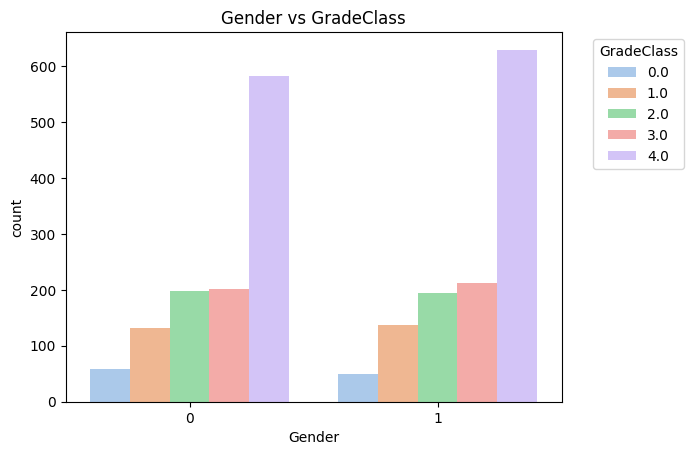

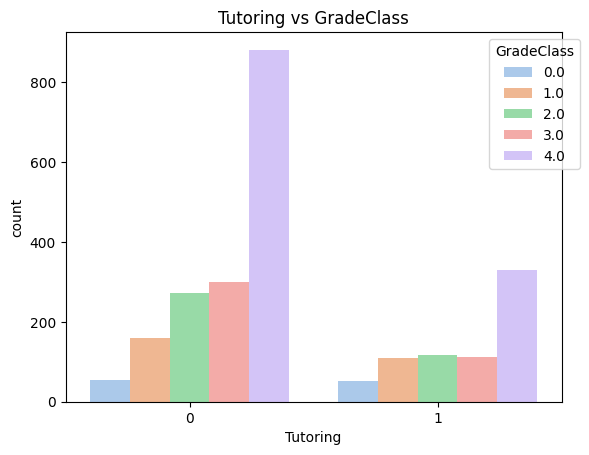

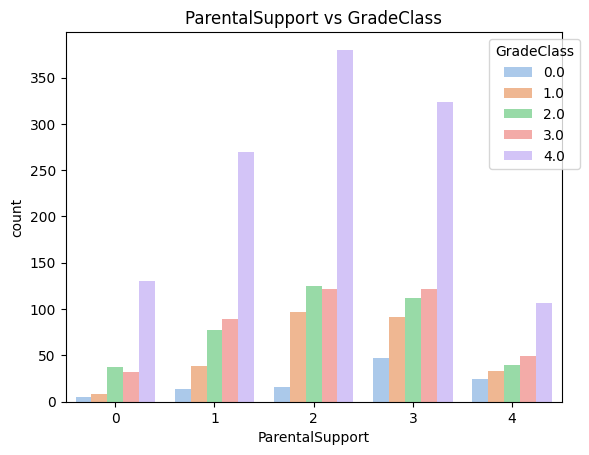

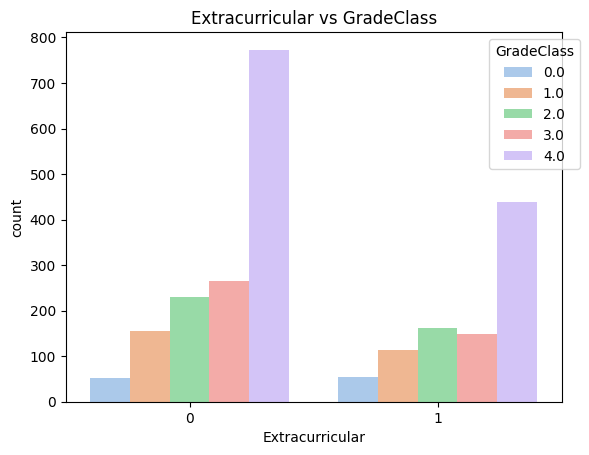

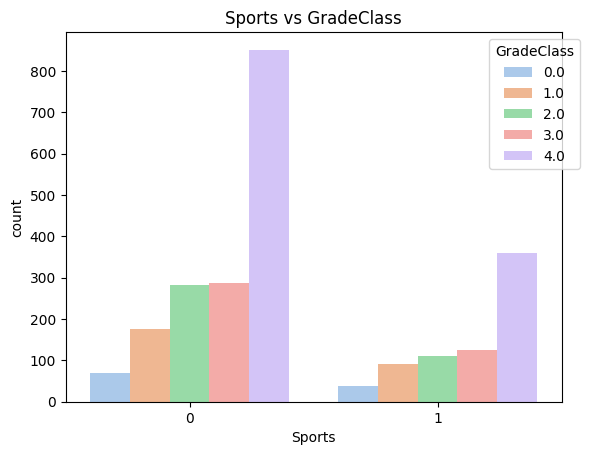

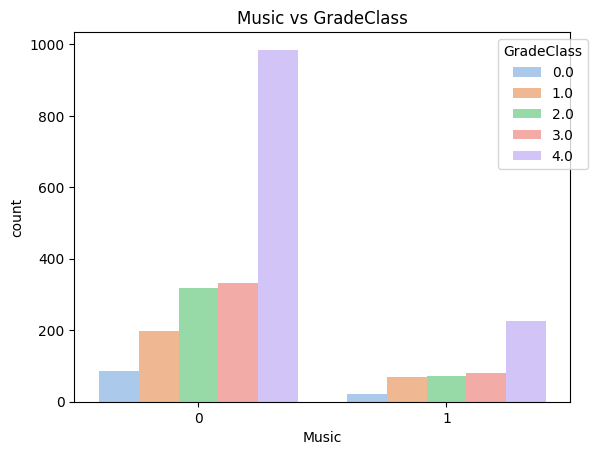

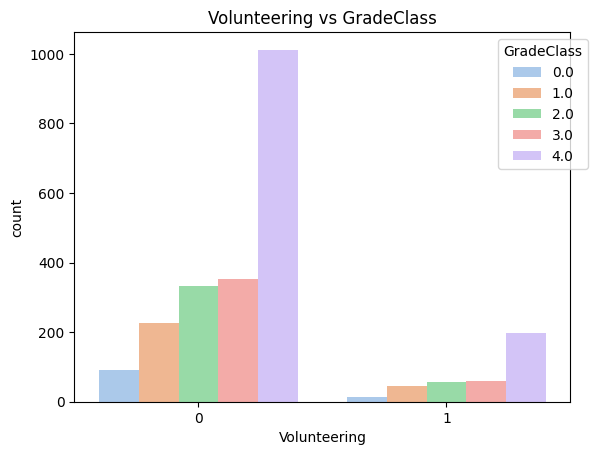

In [ ]:
categorical = ['Age', 'Gender', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for c in categorical:
    sns.countplot(x=c, hue='GradeClass', data=df, palette='pastel')
    plt.title(f'{c} vs GradeClass')
    plt.legend(title='GradeClass', bbox_to_anchor=(1.05,1))
    plt.show()


**PREPROCESADO DE DATOS**

Hacemos la agrupación de GradeClass: 0,1,2,3 = Aprobado (1) y GradeClass: 4 = Suspendido (0) --> Clasificación Binaria

In [ ]:
# Crear variable binaria Pass/Fail
df['pass_fail'] = df['GradeClass'].apply(lambda x: 1 if x in [0,1,2,3] else 0)

# Verificar
print(df['pass_fail'].value_counts())  # muestra cuántos aprobados (1) y suspensos (0)

df = df.drop(columns=['GPA', 'StudentID', 'GradeClass'])

pass_fail
0    1211
1    1181
Name: count, dtype: int64


In [ ]:
df = df.drop(columns=['GPA', 'StudentID', 'GradeClass'])

In [ ]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,pass_fail
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,1
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,1
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1


Separar variables predictoras y target:

In [ ]:
X = df.drop(columns=['pass_fail'])
y = df['pass_fail']


Detección de variables categóricas y numéricas:

In [ ]:
cat_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
                'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

num_features = ['Age', 'StudyTimeWeekly', 'Absences']


In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'pass_fail'],
      dtype='object')

Escalado de variables numéricas:

In [ ]:
#Algunos modelos (como KNN, SVM o regresión logística) son sensibles a la escala, así que es importante normalizar las numéricas.
# Crear una copia de X antes de escalar
X_scaled = X.copy()

# Escalar solo las variables numéricas
scaler = StandardScaler()
X_scaled[num_features] = scaler.fit_transform(X_scaled[num_features])

#Esto convierte las variables numéricas a media 0 y desviación estándar 1.

In [ ]:
X_scaled

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,0.472919,1,0,2,1.780336,-0.890822,1,2,0,0,1,0
1,1.362944,0,0,1,0.997376,-1.717694,0,1,0,0,0,0
2,-1.307132,0,2,3,-0.984045,1.353542,0,2,0,0,0,0
3,0.472919,1,0,3,0.045445,-0.063951,0,3,1,0,0,0
4,0.472919,1,0,2,-0.902311,0.290422,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,1.362944,1,0,3,0.160762,-1.481445,0,4,1,0,0,0
2388,0.472919,0,0,1,-0.387285,-1.245196,1,4,0,1,0,0
2389,-0.417106,1,0,2,-0.524895,0.644796,0,2,0,0,0,1
2390,-0.417106,1,1,0,0.467950,0.290422,0,2,0,1,1,0


Dividir en entrenamiento y prueba:

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1913, 12)
(479, 12)


**PCA**

In [ ]:

# # Ajustar PCA sin limitar componentes
# pca_full = PCA()
# pca_full.fit(X)

# # Varianza explicada acumulada
# var_acum = np.cumsum(pca_full.explained_variance_ratio_)

# plt.figure(figsize=(8,5))
# plt.plot(range(1, len(var_acum)+1), var_acum, marker='o')
# plt.xlabel('Número de Componentes')
# plt.ylabel('Varianza explicada acumulada')
# plt.title('Selección óptima de componentes')
# plt.grid(True)
# plt.show()

# # Saber cuántos componentes necesitas para el 90% de varianza
# n_opt = np.argmax(var_acum >= 0.90) + 1
# print(f"Para conservar el 90% de la varianza necesitas {n_opt} componentes.")


In [ ]:
pca = PCA(n_components=8)

X_pca = pca.fit_transform(X)

In [ ]:
# # DataFrame
# pca_df = pd.DataFrame(
#     data = X_pca,
#     columns = [f'PC{i+1}' for i in range(pca.n_components_)]
# )

# print("Datos transformados por PCA:")
# display(pca_df)

# print("\nVarianza explicada por cada componente principal:")
# print(pca.explained_variance_ratio_)

In [ ]:

# #Ver cómo contribuye cada variable a las componentes principales
# loadings = pd.DataFrame(
#     pca.components_.T,
#     columns=pca_df.columns,   # PC1, PC2, etc.
#     index=X.columns
# )

# print("\nMatriz de pesos de cada feature:")
# display(loadings.style.background_gradient(cmap='coolwarm', axis=0))

- PC1 representa principalmente la cantidad de ausencias → una dimensión que mide asistencia o responsabilidad.

- PC2 representa principalmente las horas de estudio → una dimensión que mide dedicación académica.

Como las demás variables tienen pesos muy bajos, en este PCA de dos componentes la variabilidad del dataset se explica casi toda por el contraste entre asistencia y tiempo de estudio.

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1️⃣ Gráfico de dispersión de las dos primeras componentes principales
# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     x=pca_df["PC1"],
#     y=pca_df["PC2"],
#     hue=y,
#     alpha=0.8
# )
# plt.title("Visualización PCA (2 Componentes Principales)")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.legend(title="Clase")
# plt.grid(True)
# plt.show()


**Entrenamiento de modelos**

In [ ]:

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_sc, y_train_sc)
    acc = modelo.score(X_test_sc, y_test_sc)
    print(f"{nombre}: {acc:.3f}")


Logistic Regression: 0.906
Naive Bayes: 0.889
SVM: 0.889


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    acc = modelo.score(X_test, y_test)
    print(f"{nombre}: {acc:.3f}")


Logistic Regression: 0.906
Naive Bayes: 0.889
SVM: 0.896
